In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# ㅁOne Point Tutorial III - `TIMESERIES`
<p style='text-align: right;'> Python을 활용한 데이터 사이언스 </p>
<p style='text-align: right;'> December, 2019 | All rights reserved by Wooseok Song</p>

---

# 0. 목차소개

1. PSL의 datetime 모듈에 대하여
2. Time Series Data Handling
3. Period
4. Resampling
5. TimeSeries 그리기

목표 : 시계열 데이터를 다루는 데에 있어서 필요한 기본기들을 익히도록 하자

# 1. PSL의 datetime 모듈에 대하여

파이썬에는 기본라이브러리(Python Standard Library)에 날짜와 시간을 담당하는 모듈이 있다. *datetime.py*

In [4]:
from datetime import datetime
import numpy as np
import pandas as pd

## 1.1 datetime 객체의 주요 attribute

`datetime.year`

`datetime.month`

`datetime.day`

`datetime.hour`

`datetime.second`

`datetime.microsecond`

## 1.2 datetime 객체의 생성 방법

In [2]:
datetime.now()

datetime.datetime(2019, 8, 30, 18, 10, 3, 904273)

표현식에서는 second와 microsecond가 0일 경우에 표시하지 않는다.

In [3]:
datetime(2019, 8, 27)

datetime.datetime(2019, 8, 27, 0, 0)

## 1.3 datetime 객체의 산술 연산

datetime간의 - 연산

In [4]:
datetime.now() - datetime(2019, 8, 27)

datetime.timedelta(days=3, seconds=65404, microseconds=744619)

datetime과 timedelta간의 산술 연산

In [5]:
from datetime import timedelta

In [6]:
t1 = datetime(2019, 1, 1)

In [7]:
t1 + timedelta(12)

datetime.datetime(2019, 1, 13, 0, 0)

In [8]:
t1 + 2 * timedelta(12)

datetime.datetime(2019, 1, 25, 0, 0)

In [9]:
t1 - timedelta(12)

datetime.datetime(2018, 12, 20, 0, 0)

## 1.4 string, datetime, pd.timestamp 객체 간의 변환

외부에서 긁어모은 데이터를 원하는 형식으로 나타내고자 할 때 변환을 많이 한다.

### 1.4.1 str ==> datetime

문자열에서 시간에 관련한 정보가 어떻게 저장되어있는 지 포맷을 전달하면 된다.

In [10]:
datetime.strptime('2019-08-01', '%Y-%m-%d')

datetime.datetime(2019, 8, 1, 0, 0)

In [11]:
datetime.strptime('2019/08/01', '%Y/%m/%d')

datetime.datetime(2019, 8, 1, 0, 0)

In [12]:
datetime.strptime('08/01/19', '%m/%d/%y')

datetime.datetime(2019, 8, 1, 0, 0)

### 1.4.2 datetime ==> str

In [13]:
datetime(2019,8,1).strftime('%Y-%m-%d')

'2019-08-01'

### 1.4.3 str ==> timestamp

In [14]:
pd.to_datetime(['2019-08-01', '2019/08/02'])

DatetimeIndex(['2019-08-01', '2019-08-02'], dtype='datetime64[ns]', freq=None)

# 2. Time Series Data Handling

## 2.1 Time Series 객체를 생성하는 방법

pd.Series의 parameter **index**에 시간을 넣어주면 시계열 데이터이다.

index에 시간을 넣어주는 방법

> 1. datetime을 원소로 갖는 iterable한 객체
> 2. pd.DatetimeIndex 객체

In [15]:
dates = [datetime(2019,8,1), datetime(2019,8,3), datetime(2019,8,8), datetime(2019,9,11), datetime(2019,10,1)]

In [16]:
ts1 = pd.Series(np.arange(5), index=dates)

In [17]:
ts1

2019-08-01    0
2019-08-03    1
2019-08-08    2
2019-09-11    3
2019-10-01    4
dtype: int32

In [18]:
ts1.index

DatetimeIndex(['2019-08-01', '2019-08-03', '2019-08-08', '2019-09-11',
               '2019-10-01'],
              dtype='datetime64[ns]', freq=None)

In [19]:
ts1 = pd.Series(np.arange(5), pd.DatetimeIndex(dates))

In [20]:
ts1

2019-08-01    0
2019-08-03    1
2019-08-08    2
2019-09-11    3
2019-10-01    4
dtype: int32

## 2.2 TimeSeries의 Index를 만드는 방법

위에서 우리는 모든 것을 날짜를 하여서 Index를 만들었지만, **특정한 규칙**을 통해서 만들고 싶은 경우가 많다.

이 때, `pd.date_range`라는 함수를 사용한다.

freq에 들어갈 수 있는 argument들

> D : <blank>매일<br>
A : 매년<br>
B : 매근무일<br>
T : 매초<br>
M : 매월말<br>
MS : 매월초<br>
BM : 매근무월말<br>
BMS : 매근무월초<br>
W-MON : 매주월요일<br>
W-1MON : 매월;첫월요일<br>
Q-JAN : 매분기;1월말기준<br>
QS-JAN : 매분기;1월초기준<br>
BQ-JAN : 매분기;근무1월말기준<br>
BQS-JAN : 매분기;근무1월초기준

In [21]:
pd.date_range('1/1/2000', periods=10)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range('1/1/2000', periods=10, freq='M')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31'],
              dtype='datetime64[ns]', freq='M')

In [71]:
ts1 = pd.Series(np.arange(10), index=_)

In [72]:
ts1

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
2000-05-31    4
2000-06-30    5
2000-07-31    6
2000-08-31    7
2000-09-30    8
2000-10-31    9
Freq: M, dtype: int32

시계열 데이터에서 lagging은 **freq**기반으로 움직인다.

In [25]:
ts1.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    0.0
2000-04-30    1.0
2000-05-31    2.0
2000-06-30    3.0
2000-07-31    4.0
2000-08-31    5.0
2000-09-30    6.0
2000-10-31    7.0
Freq: M, dtype: float64

In [26]:
ts1.shift(2, freq='M')

2000-03-31    0
2000-04-30    1
2000-05-31    2
2000-06-30    3
2000-07-31    4
2000-08-31    5
2000-09-30    6
2000-10-31    7
2000-11-30    8
2000-12-31    9
Freq: M, dtype: int32

## 2.3 Time Series 데이터를 indexing&slicing을 통해 접근&변경하는 법

In [76]:
ts1.index[1]

Timestamp('2000-02-29 00:00:00', freq='M')

index를 그대로 입력하는 것은 어려운 일이지만 아래처럼 다양한 형태로 입력을 하여도 찾아준다.

In [77]:
ts1['2000-01-31']
ts1['20000131']
ts1['01-31-2000']
ts1['01/31/2000']

0

In [78]:
ts1[:]

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
2000-05-31    4
2000-06-30    5
2000-07-31    6
2000-08-31    7
2000-09-30    8
2000-10-31    9
Freq: M, dtype: int32

In [82]:
ts1['2000-02-29'] = 100
ts1

2000-01-31      0
2000-02-29    100
2000-03-31      2
2000-04-30      3
2000-05-31      4
2000-06-30      5
2000-07-31      6
2000-08-31      7
2000-09-30      8
2000-10-31      9
Freq: M, dtype: int32

In [79]:
ts1['2000-01'] # 시계열 데이터의 특수한 Indexing

2000-01-31    0
Freq: M, dtype: int32

In [83]:
ts1['2000-01':'2000-03']

2000-01-31      0
2000-02-29    100
2000-03-31      2
Freq: M, dtype: int32

# 3. Period

## 3.1 Period란?

우리가 지금까지 다뤘던 pd.DatetimeIndex의 원소인 Timestamp는 **point**라면 pd.Periods는 **구간**이다

## 3.2 Period 객체의 주요 attribute

`Period.day`
> 이 구간의 끝점의 일자이다.

`Period.dayofweek`
> 이 구간의 끝점의 요일이다. 

`Period.starttime`
> 이 구간의 시작점이다.

`Period.endtime`
> 이 구간의 끝점이다.

## 3.3 Period 객체를 생성하는 방법

2007년에서 끝점(`OCT`)이 10월 31일인 1년짜리(`A-`) 구간을 생성하고 싶다면

In [30]:
pd.Period(2007, freq='A-OCT')

Period('2007', 'A-OCT')

In [31]:
pd.Period(2007, freq='A-OCT').start_time

Timestamp('2006-11-01 00:00:00')

In [32]:
pd.Period(2007, freq='A-OCT').end_time

Timestamp('2007-10-31 23:59:59.999999999')

### 3.4 Period 객체들을 생성하고 시계열 데이터를 만들기

끝점(`2019Q4`)을 12월 말(`DEC`)로 뒀을 때 시작점(`2018Q1`)부터 분기(`Q-`)마다 구간을 나눠서 range를 만들고!

In [33]:
pd.period_range('2018Q1', '2019Q4', freq='Q-DEC')

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

이를 이용하여 시계열 데이터를 만들어보자. 

In [34]:
ts1 = pd.Series(np.arange(8), index=_)

In [35]:
ts1

2018Q1    0
2018Q2    1
2018Q3    2
2018Q4    3
2019Q1    4
2019Q2    5
2019Q3    6
2019Q4    7
Freq: Q-DEC, dtype: int32

In [36]:
ts1.index

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

# 4. Resampling

우리는 특정한 기준을 가지고 주어진 시계열 데이터셋을 줄이거나 늘리고 싶을 떄가 있다.

줄이는 행위를 **downsampling**이라하고 늘리는 행위를 **upsampling** 이라고 한다.

## 4.1 Downsampling

Downsampling의 핵심 키워드는 **aggregating**이다.

In [37]:
dates = pd.date_range('1/1/2019', periods=14, freq='T')

In [38]:
ts = pd.Series(np.arange(14), index=dates)

In [39]:
ts

2019-01-01 00:00:00     0
2019-01-01 00:01:00     1
2019-01-01 00:02:00     2
2019-01-01 00:03:00     3
2019-01-01 00:04:00     4
2019-01-01 00:05:00     5
2019-01-01 00:06:00     6
2019-01-01 00:07:00     7
2019-01-01 00:08:00     8
2019-01-01 00:09:00     9
2019-01-01 00:10:00    10
2019-01-01 00:11:00    11
2019-01-01 00:12:00    12
2019-01-01 00:13:00    13
Freq: T, dtype: int32

In [40]:
ts.resample('5min').apply(sum)

2019-01-01 00:00:00    10
2019-01-01 00:05:00    35
2019-01-01 00:10:00    46
Freq: 5T, dtype: int32

In [41]:
ts.resample('5min').apply(sum).shift(10, freq='5min')

2019-01-01 00:50:00    10
2019-01-01 00:55:00    35
2019-01-01 01:00:00    46
Freq: 5T, dtype: int32

In [42]:
ts.resample('5min').ohlc()

open  high  low  close
2019-01-01 00:00:00     0     4    0      4
2019-01-01 00:05:00     5     9    5      9
2019-01-01 00:10:00    10    13   10     13

## 4.2 Upsampling

Upsamlpling하면 핵심 키워드는 **interpolation**이다. 더 채워 넣는다는 것은 자료들의 빈칸을 채워야하기 때문이다.

예를 들어, 주가의 경우 주말에 기록된 것이 없기 때문에 일자별로 Upsampling하게 되면 채워줘야한다.

In [43]:
df = pd.DataFrame({'Naver': [100, 101, 103, 105], 'Kakao':[90, 100, 110, 90]}, index=pd.date_range('2019-08-01', periods=4, freq='B'))

In [44]:
df

Naver  Kakao
2019-08-01    100     90
2019-08-02    101    100
2019-08-05    103    110
2019-08-06    105     90

In [45]:
df.resample('D').ffill()

Naver  Kakao
2019-08-01    100     90
2019-08-02    101    100
2019-08-03    101    100
2019-08-04    101    100
2019-08-05    103    110
2019-08-06    105     90

In [46]:
df.resample('D').ffill(limit=1) # 한 개 이상 채우지 말기를!

Naver  Kakao
2019-08-01  100.0   90.0
2019-08-02  101.0  100.0
2019-08-03  101.0  100.0
2019-08-04    NaN    NaN
2019-08-05  103.0  110.0
2019-08-06  105.0   90.0

## 4.3 Resampling with Periods

시계열 데이터의 index가 timestamp가 아닌 period인 경우에 resampling을 어떻게 할까?

In [47]:
frame = pd.DataFrame(np.)

SyntaxError: invalid syntax (<ipython-input-47-b484bddfbe88>, line 1)

In [48]:
df

Naver  Kakao
2019-08-01    100     90
2019-08-02    101    100
2019-08-05    103    110
2019-08-06    105     90

In [49]:
df.index = pd.period_range('2008', '2011', freq='A-DEC')

In [50]:
df

Naver  Kakao
2008    100     90
2009    101    100
2010    103    110
2011    105     90

#### 2년 단위로 downsampling을 하고 싶다면?

In [51]:
df.resample('2y').apply(sum, axis=0)

Naver  Kakao
2008    201    190
2010    208    200

In [52]:
df.resample('2y').apply(lambda x: x.mean())

Naver  Kakao
2008  100.5     95
2010  104.0    100

#### 분기 단위로 upsampling을 하고 싶다면?

In [53]:
df.resample('Q').fillna(method='ffill')

Naver  Kakao
2008Q1    100     90
2008Q2    100     90
2008Q3    100     90
2008Q4    100     90
2009Q1    101    100
2009Q2    101    100
2009Q3    101    100
2009Q4    101    100
2010Q1    103    110
2010Q2    103    110
2010Q3    103    110
2010Q4    103    110
2011Q1    105     90
2011Q2    105     90
2011Q3    105     90
2011Q4    105     90

In [54]:
df.resample('Q').ffill()

Naver  Kakao
2008Q1    100     90
2008Q2    100     90
2008Q3    100     90
2008Q4    100     90
2009Q1    101    100
2009Q2    101    100
2009Q3    101    100
2009Q4    101    100
2010Q1    103    110
2010Q2    103    110
2010Q3    103    110
2010Q4    103    110
2011Q1    105     90
2011Q2    105     90
2011Q3    105     90
2011Q4    105     90

# 5. Time Series Plotting

In [2]:
#!pip install pandas_datareader

In [10]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime(2019,1,1)
end = datetime.now()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "yahoo", start, end)
ms =  web.DataReader("MSFT", "yahoo", start, end)
amz =  web.DataReader("AMZN", "yahoo", start, end)

In [11]:
df_volume = pd.DataFrame({'apple':apple.Volume, 'ms':ms.Volume, 'amz':amz.Volume})

In [12]:
df_volume = df_volume.astype(np.int64)

In [13]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2018-12-31 to 2019-12-16
Data columns (total 3 columns):
apple    243 non-null int64
ms       243 non-null int64
amz      243 non-null int64
dtypes: int64(3)
memory usage: 7.6 KB


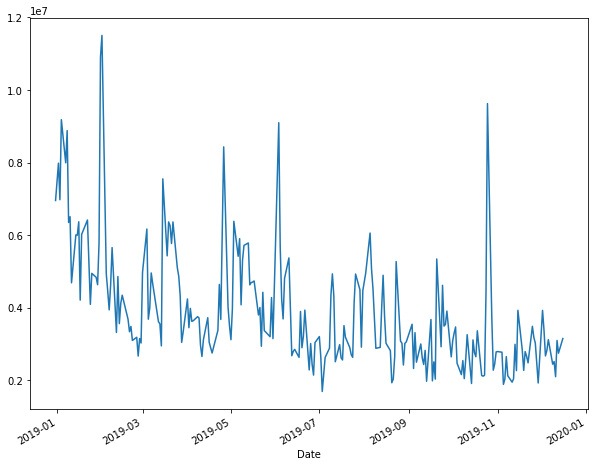

In [14]:
df_volume['amz'].plot(figsize=(10, 8))

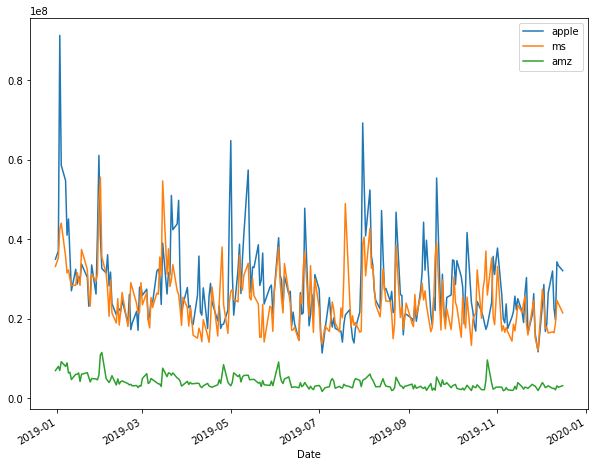

In [15]:
df_volume.plot(figsize=(10, 8))

### Moving Window Functions

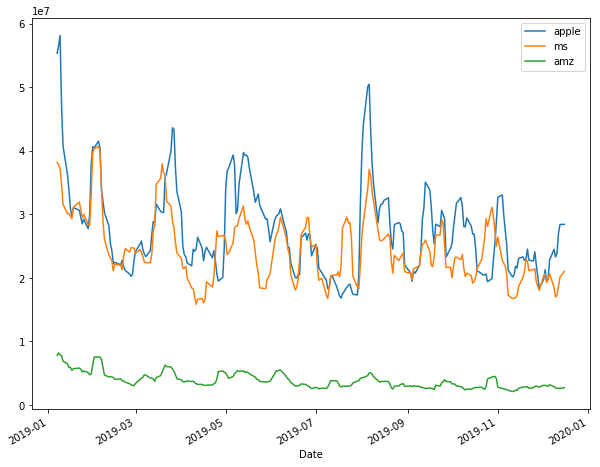

In [16]:
df_volume.rolling(window=5).mean().plot(figsize=(10, 8))